
<center> <h2> Car Evaluation Database </h2> </center>

In [1]:
# Libraries Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# list to store the column names in the dataset where we give the sense of the variables
column_names = ['buying_price', 'maintenance', 'doors', 'persons', 'luggage_boot_size', 'safety', 'class_value']
# class_value = car acceptability. It is not replaced to handle the column better

In [3]:
# Getting data
# Do not forget to have 'car.data' in the same directory than this jupyter notebook
car_data = pd.read_csv('car.data', names=column_names)

In [4]:
car_data.head()

,buying_price,maintenance,doors,persons,luggage_boot_size,safety,class_value
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
# Data Characteristics
car_data.describe().T

,count,unique,top,freq
buying_price,1728,4,med,432
maintenance,1728,4,med,432
doors,1728,4,5more,432
persons,1728,3,more,576
luggage_boot_size,1728,3,med,576
safety,1728,3,med,576
class_value,1728,4,unacc,1210


In [6]:
#Take a look at the distribution of every colum in the dataset
for i in car_data.columns:
    print(car_data[i].value_counts())
    print()

med      432
high     432
low      432
vhigh    432
Name: buying_price, dtype: int64

med      432
high     432
low      432
vhigh    432
Name: maintenance, dtype: int64

5more    432
3        432
4        432
2        432
Name: doors, dtype: int64

more    576
4       576
2       576
Name: persons, dtype: int64

med      576
big      576
small    576
Name: luggage_boot_size, dtype: int64

med     576
high    576
low     576
Name: safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: class_value, dtype: int64



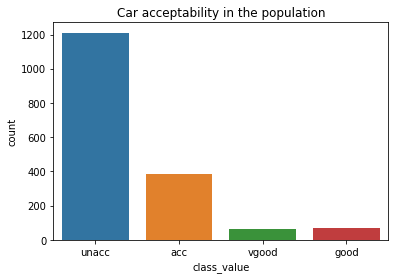

In [7]:
# Once I realized about the different distribution of 'class_value'. I created a Graph to see what's going on there
# Univariable analysis
fig = sns.countplot(car_data['class_value'])
fig.set_title('Car acceptability in the population')
fig.figure.savefig("class_values.png")

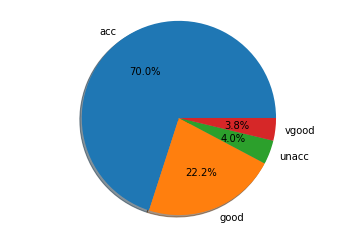

In [8]:
# A pie chart is plotted to see the percentage distribution of every different data

# Every differente string is stored in a list 'class_values'
class_value = car_data.class_value.value_counts()
labels = ['acc', 'good','unacc', 'vgood']
sizes = [class_value[0], class_value[1], class_value[2], class_value[3]]
# print(sizes) # adds up to 1433, which is the total number of participants
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.savefig("pie_chart.png")
plt.show()

In the distribution of the 'class_value' it can be seen as car acceptability
where 70% of the population is not confortable with their car

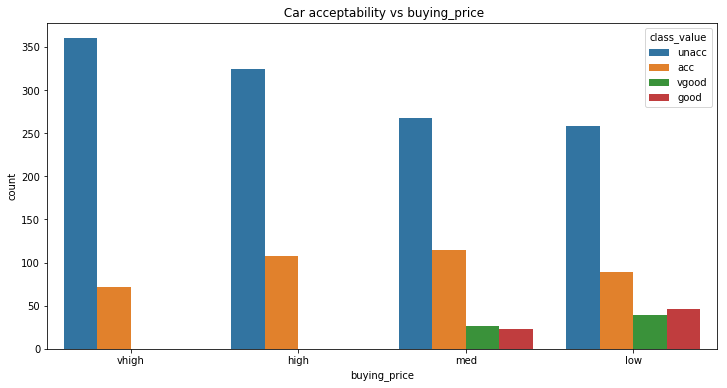

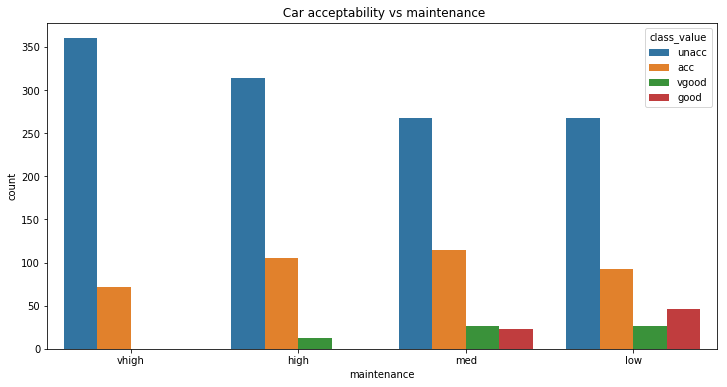

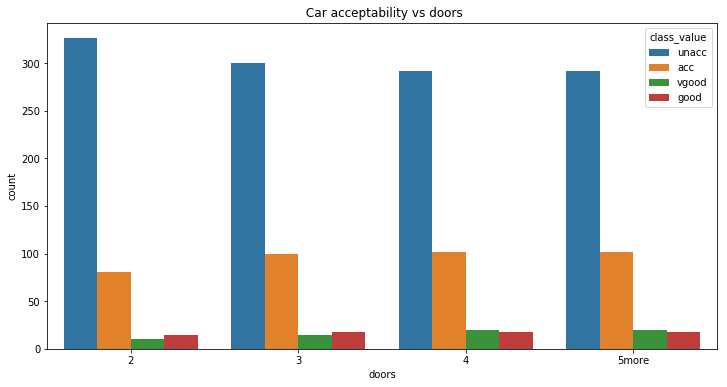

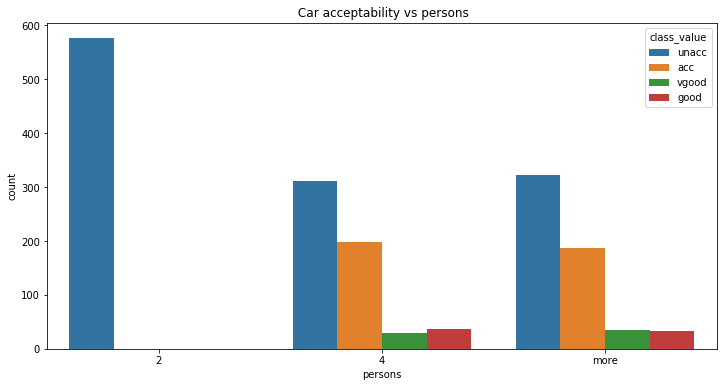

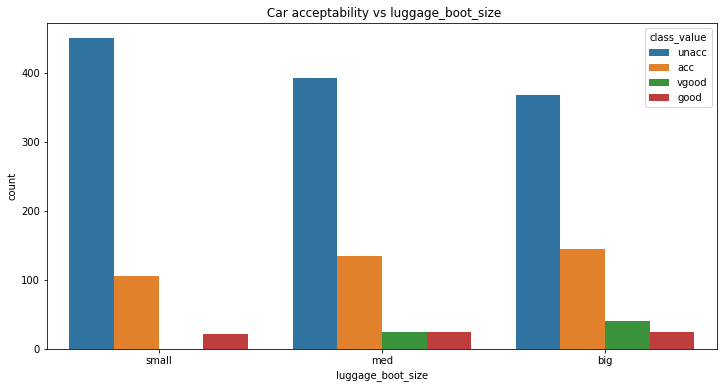

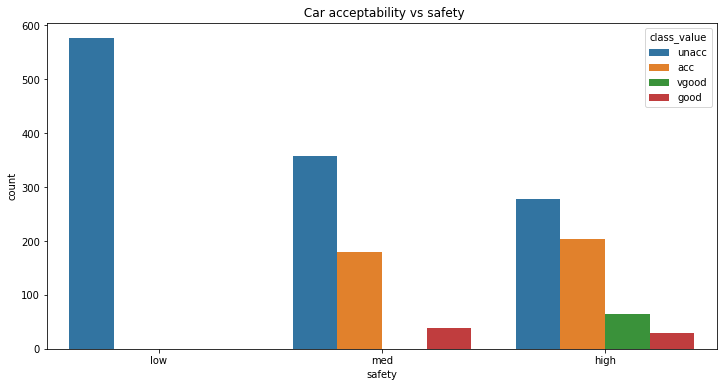

In [13]:
# Countplots to visualize how each feature is distributes based on various parameter

# Multivariable analysis
for i in car_data.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title(" Car acceptability vs %s"%i)
    fig2 = sns.countplot(car_data[i],hue=car_data['class_value'])
    fig2.figure.savefig(f"{i}.png")

<center> <h2> Conclusions about the graphs </h2> </center>


The stability of the graphs shows how important are the variables: 

more instability = important

stability = not much important

1. Buying price: normal
2. Maintenance: normal
3. doors: least important
4. persons: an important factor car
5. Luggage boot size: normal
6. Safety: low safety cars are not accepted by the customers


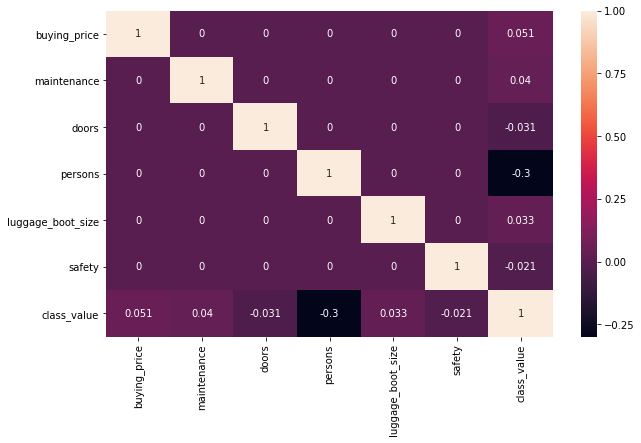

In [14]:
# Convert string categories to integers as level values. All this for to use heatmap
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in car_data.columns:
    car_data[i]=le.fit_transform(car_data[i])

#Create the heatmap
fig=plt.figure(figsize=(10,6))
fig3 = sns.heatmap(car_data.corr(),annot=True)
fig3.figure.savefig("heatmap.png")


<center> <h2> Conclusions about the heat map </h2> </center>


Firstly, if the diagonal values (white boxes) are ignored, it can be seen that most of the columns shows very weak correlation with 'class_values'. 

'persons' column is showning a weak relation with 'class'. Other columns except 'class_values' shows no correlation with each other.

Then, plotting these columns with each other or doing any analysis on them may not give any productive output.